<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/intro_geodataframe/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

Historically, the most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to **Paidea** and download three compressed files from the folder **WorldMaps**.
5. Download those files into the folder **maps** in your computer: *countries*, *cities*, and *rivers*.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [ ]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [ ]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, those pandas commands are working fine, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

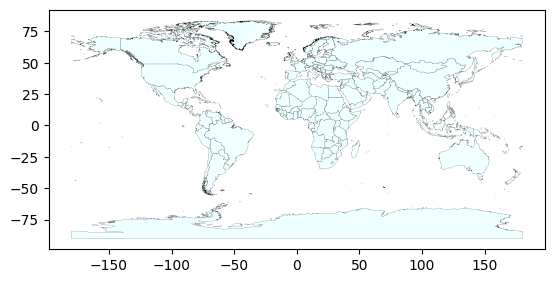

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [ ]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

This is the rivers map:

<Axes: >

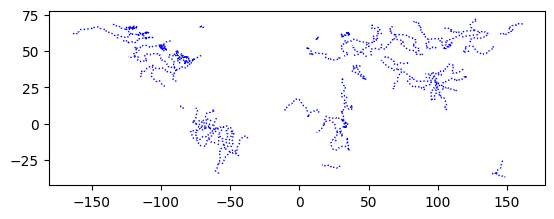

In [ ]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

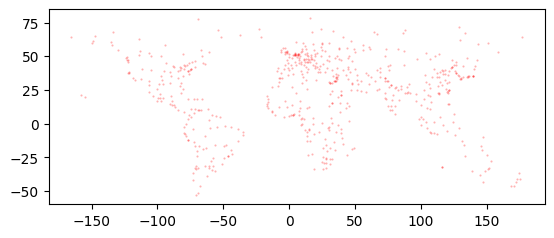

In [ ]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

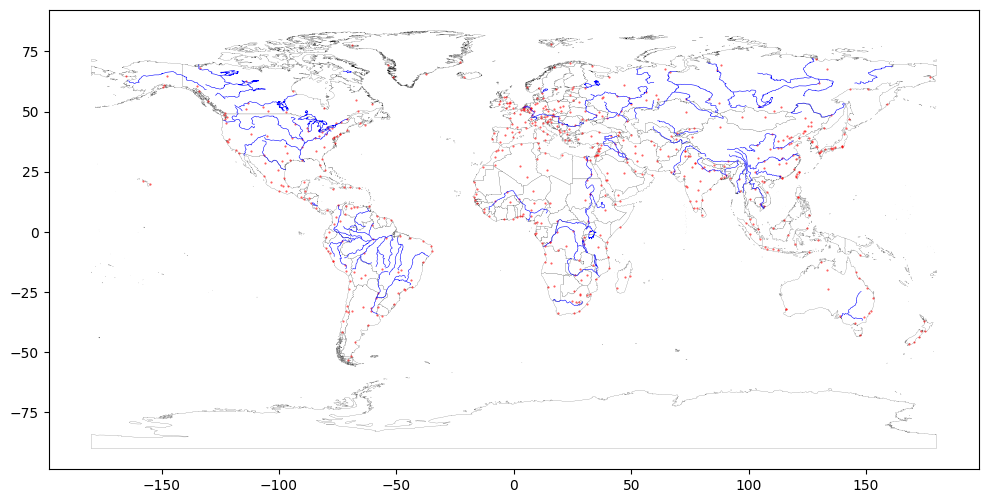

In [ ]:
#Se grafica en orden
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


Saving into a different format (not shapefile):

In [ ]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


Let add some information to each country:

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [ ]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [ ]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

## Fuzzy merging

Let's find similar names:

In [ ]:
!pip show thefuzz

Name: thefuzz
Version: 0.22.1
Summary: Fuzzy string matching in python
Home-page: https://github.com/seatgeek/thefuzz
Author: Adam Cohen
Author-email: adam@seatgeek.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: rapidfuzz
Required-by: 


In [ ]:
!pip install thefuzz

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CENTRAL AFRICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),


In [ ]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (T

Preparing a _dict_ of changes:

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',


Making changes and updating:

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
126,LAOS,"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)': 'NORTH KOREA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

### Preparation

Se tiene que cloropletear indices, no conteos. Porque el tamaño del poligono tiende a sesgar.

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


<ipython-input-174-18a7e3dacd0d>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(pd.melt(theMapAndData[DataNames]),


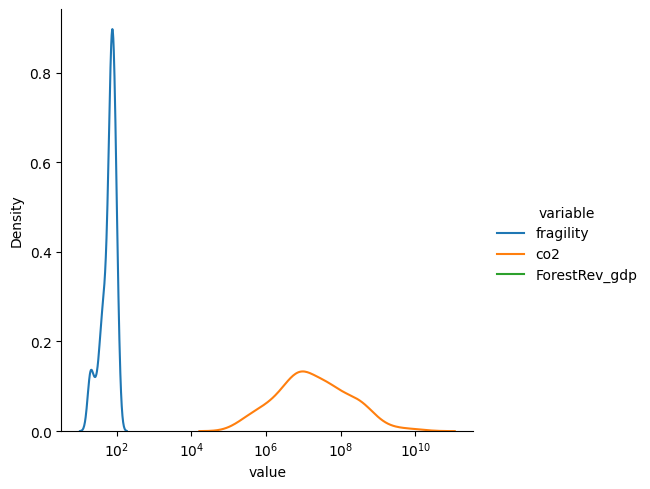

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(True,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

* **StandardScaler**:

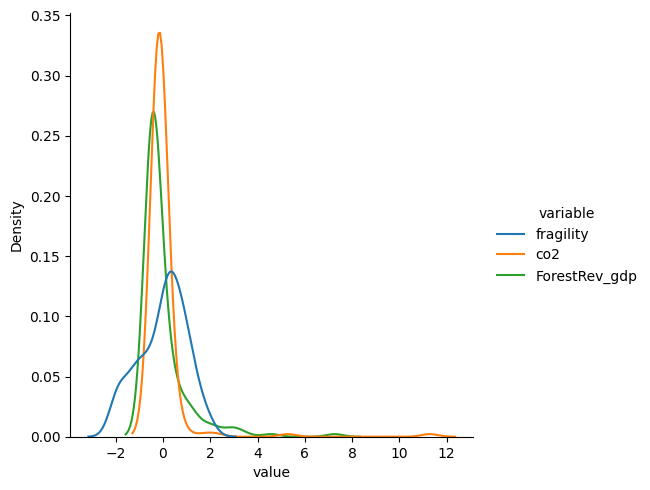

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

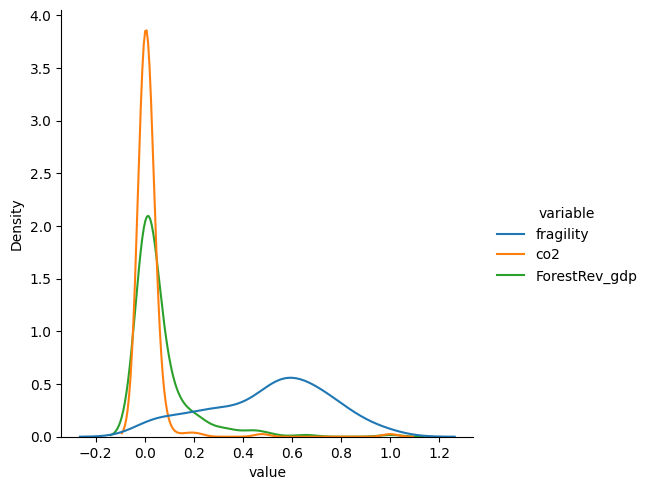

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

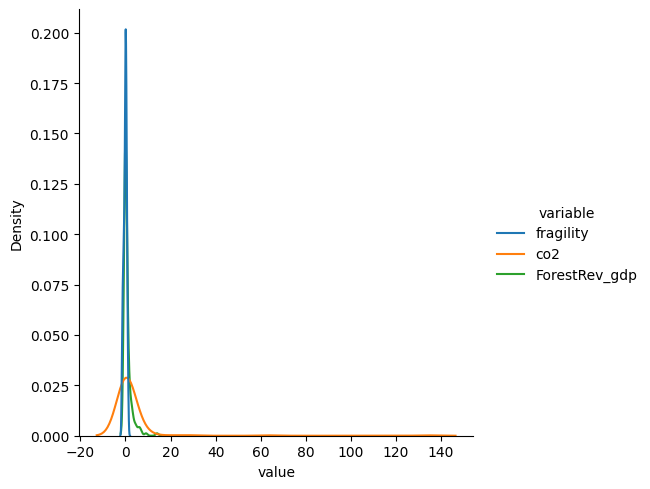

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

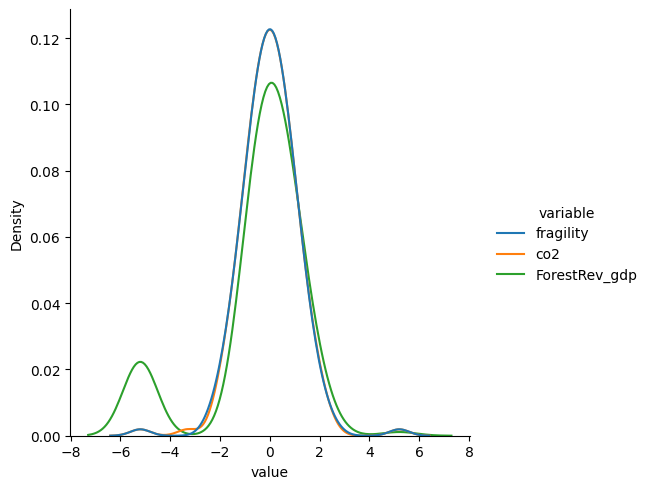

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

Quantilico es para manejar a los outliers

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.58.1
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, rmm-cu12
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine_rl, ecos, flax, folium, geem

In [ ]:
!pip install mapclassify

Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
#El que tenga menor desviación es el que nos va a servir

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

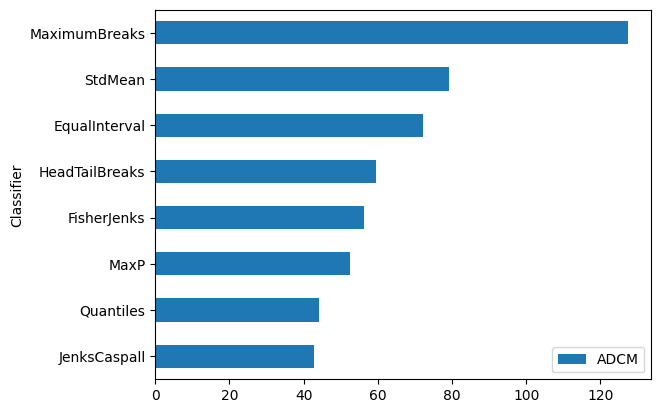

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.530113,1
1,1.827146,4
2,0.304520,3
3,0.233695,2
4,-0.424447,1


Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5']
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.685317
1,1,-0.652170
2,2,-0.006005
3,3,0.614405
4,4,1.618874


We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.530113,1,1_Good
1,1.827146,4,4_Poor
2,0.304520,3,3_Bad
3,0.233695,2,2_Middle
4,-0.424447,1,1_Good
5,-0.179018,2,2_Middle
6,0.963642,3,3_Bad
7,-0.284496,2,2_Middle
8,-0.760554,1,1_Good
9,-1.963511,0,0_Great


We are ready for a choropleth:

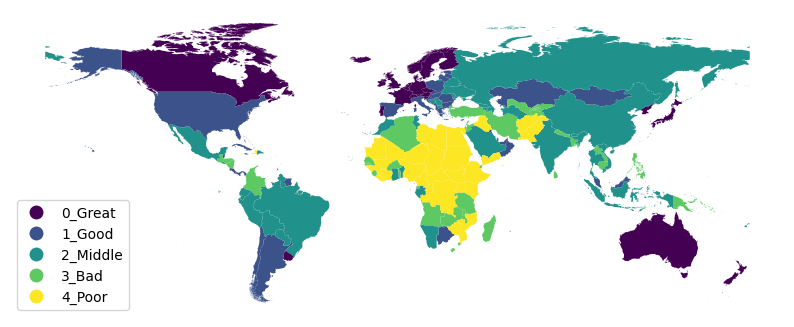

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

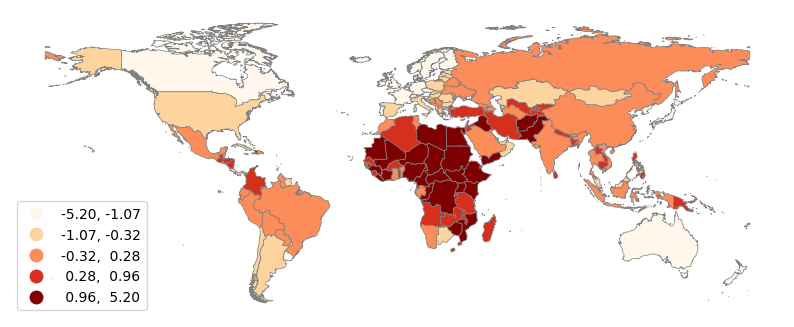

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>

Para CO2

<Axes: ylabel='Classifier'>

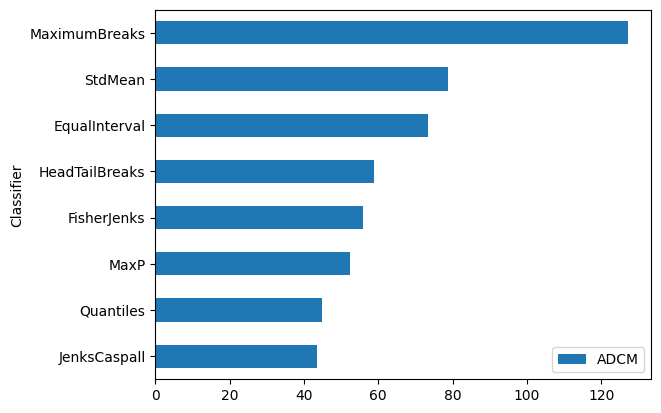

In [ ]:
theMapAndData['CO2_Qt']=QtScaled_data[:,1] #0 es para fragility, 1 es para c02, 2 es para forest

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.CO2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

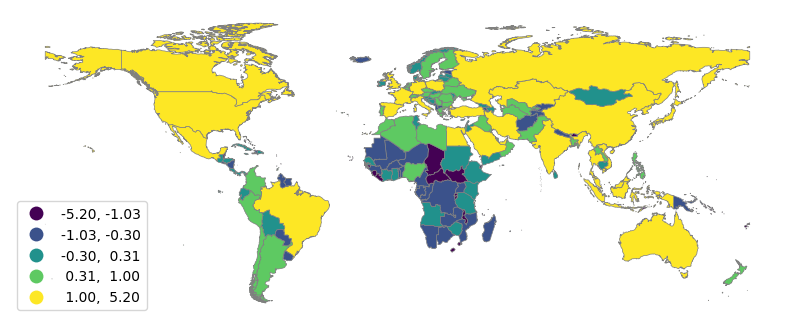

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='CO2_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Para Forest

<Axes: ylabel='Classifier'>

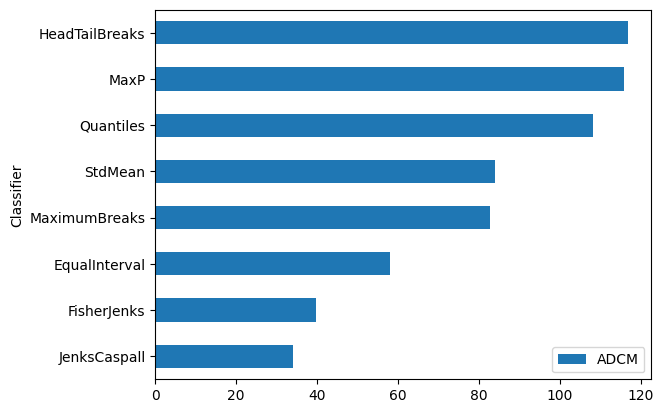

In [ ]:
theMapAndData['Forest_Qt']=QtScaled_data[:,2] #0 es para fragility, 1 es para c02, 2 es para forest

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Forest_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

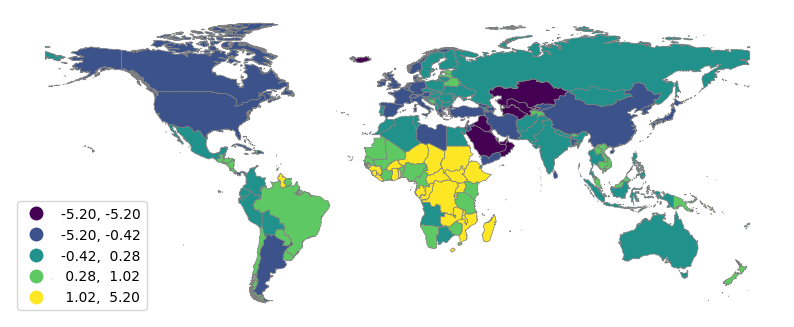

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Forest_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Agregando Nueva Variable 'Biodiversidad', extraído de: https://datacatalog.worldbank.org/search/dataset/0063384/Global-Species-Database

In [ ]:
especies=pd.read_csv('Species_Database_wb_datanam.csv')

<ipython-input-198-aac266524534>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  especies=pd.read_csv('Species_Database_wb_datanam.csv')


In [ ]:
especies.head(5)

,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,small_range,wb_datanam,wb_iso,datanam_area,datanam_pct_area
0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.560000,0,Indonesia,IDN,37194.238281,29.056736
1,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,MYS,128005.560000,0,Malaysia,MYS,88498.500000,69.136452
2,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,THA,128005.560000,0,Thailand,THA,2312.827637,1.806818
3,Amphibians,Abavorana nazgul,125160424.0,Gunung Jerai Black Stream-Frog,eng,CR,MYS,7.399752,1,Malaysia,MYS,7.399752,100.000000
4,Amphibians,Acanthixalus sonjae,56054.0,Ivory Coast Wart Frog,eng,VU,CIV,6030.019000,0,Cote d'Ivoire,CIV,5699.439453,94.517769


In [ ]:
especies.shape

(533464, 13)

In [ ]:
especie1=pd.DataFrame(especies.groupby('iso_a3').count())

In [ ]:
especie1.sum()

group               533464
binomial            533464
iucn_id_no          265845
common_name         226479
name_language       226293
iucn_category       479322
total_area          533464
small_range         533464
wb_datanam          533464
wb_iso              532546
datanam_area        533464
datanam_pct_area    533464
dtype: int64

In [ ]:
especie1=pd.DataFrame(especie1['group'])

In [ ]:
especie1['Country']=especie1.index

In [ ]:
especie1

,group,Country
iso_a3,,
ABW,2982,ABW
AFG,1336,AFG
AGO,4608,AGO
AIA,724,AIA
ALA,339,ALA
...,...,...
WSM,581,WSM
YEM,1618,YEM
ZAF,4770,ZAF


In [ ]:
theMapAndData=theMapAndData.merge(especie1,left_on='iso3', right_on='Country')

In [ ]:
theMapAndData

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,CO2_Qt,Forest_Qt,group,Country
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018,-5.301130e-01,1,1_Good,-1.417436,-5.199338,760,ATG
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018,1.827146e+00,4,4_Poor,-0.312096,-0.076809,1336,AFG
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018,3.045198e-01,3,3_Bad,0.903225,-0.352465,1635,DZA
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",The Republic of Azerbaijan,.az,AZ,AZE,2019,73.2,35389000.0,2019,MIDDLE EAST,0.02,2018,2.336949e-01,2,2_Middle,0.282063,-0.827130,1124,AZE
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018,-4.244473e-01,1,1_Good,-0.757475,-0.106447,1315,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",The Republic of Zambia,.zm,ZM,ZMB,2019,85.7,6798000.0,2019,AFRICA,4.45,2018,8.593575e-01,3,3_Bad,-0.470874,1.386281,4700,ZMB
167,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",The Republic of Zimbabwe,.zw,ZW,ZWE,2019,99.5,7902000.0,2019,AFRICA,1.61,2018,1.668252e+00,4,4_Poor,-0.285103,0.764170,2970,ZWE
168,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",The Republic of South Sudan,.ss,SS,SSD,2019,112.2,1778000.0,2019,AFRICA,2.65,2015,2.590633e+00,4,4_Poor,-1.029723,1.069020,3486,SSD
169,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",The Republic of Indonesia,.id,ID,IDN,2019,70.4,563543000.0,2019,EAST AND SOUTHEAST ASIA,0.39,2018,-1.391458e-16,2,2_Middle,1.597500,0.243292,9443,IDN


In [ ]:
array=theMapAndData['group'].values.reshape(theMapAndData['group'].shape[0],1)

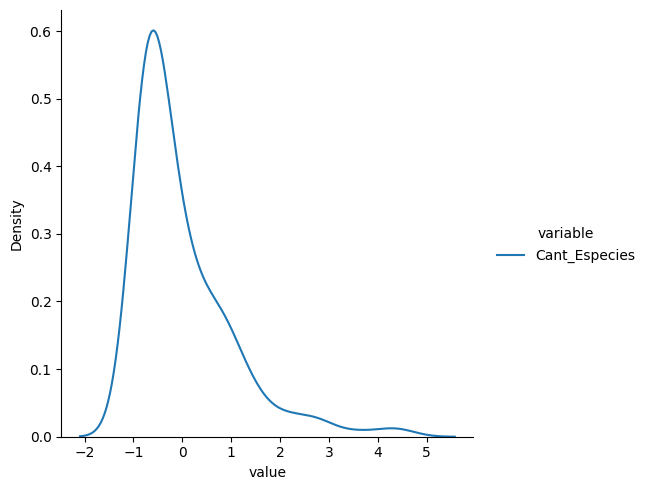

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

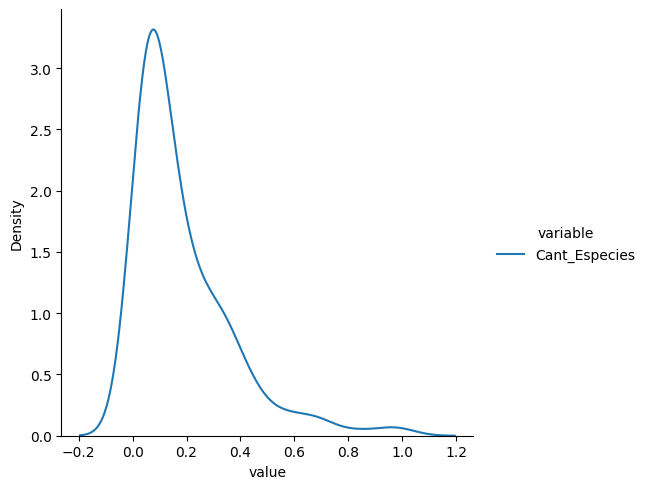

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

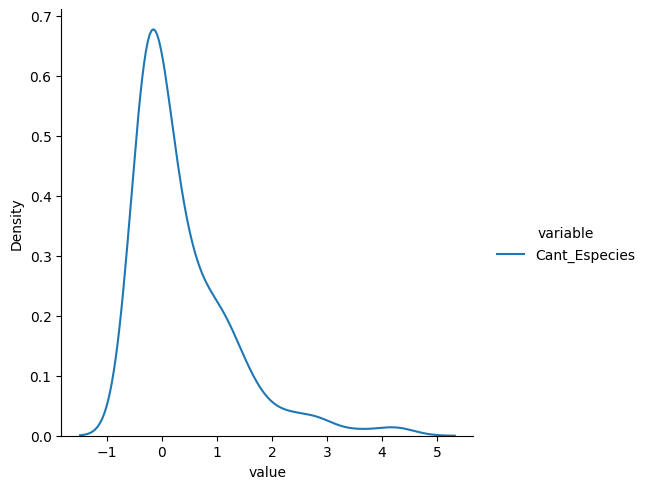

In [ ]:
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))



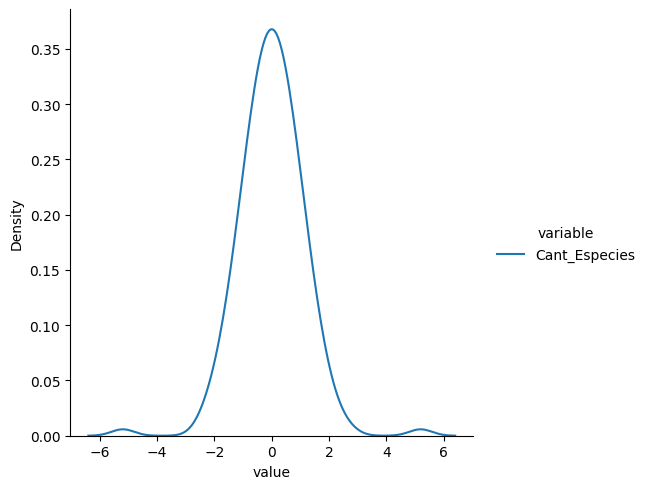

In [ ]:
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(array)

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=['Cant_Especies'])),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [ ]:
theMapAndData['BioDiversidad_Qt']=QtScaled_data

<Axes: ylabel='Classifier'>

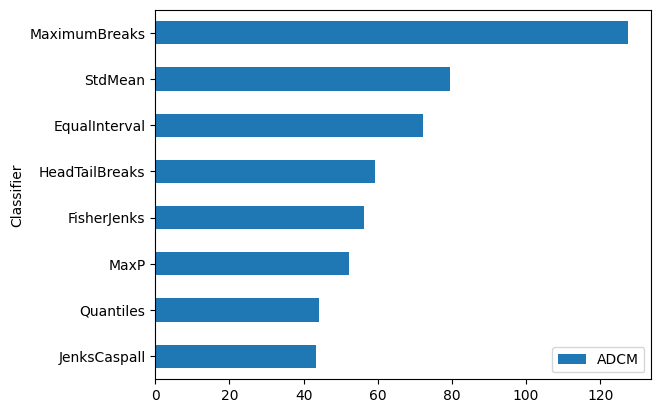

In [ ]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.BioDiversidad_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

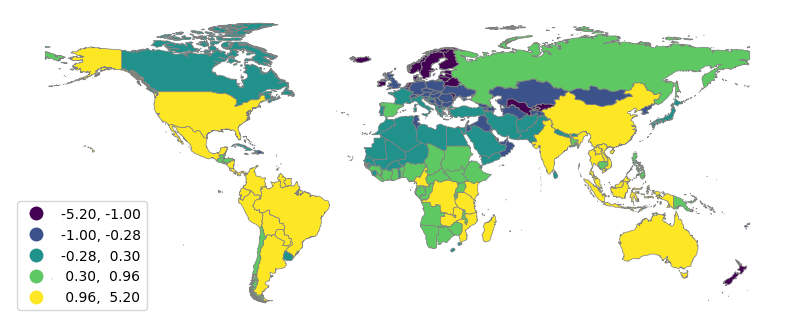

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='BioDiversidad_Qt',
                   cmap='viridis',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
theMapAndData[theMapAndData['COUNTRY']=='PERU']

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,...,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,CO2_Qt,Forest_Qt,group,Country,BioDiversidad_Qt
122,PERU,"POLYGON ((-69.56750 -10.95056, -69.56844 -10.9...",The Republic of Perú,.pe,PE,PER,2019,68.2,54996000.0,2019,...,0.12,2018,2.251015,2,2_Middle,0.536656,-0.314179,11195,PER,2.251015
